In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings("ignore")

### Реализация линейной регрессии, используя градиентный спуск

epochs - k = 58.19674155514932, b = -0.7189440964760219, error = 868.1652871136715
epsilon - k = 58.196287406970384, b = -0.7189931397842021, error = 868.1652874475013


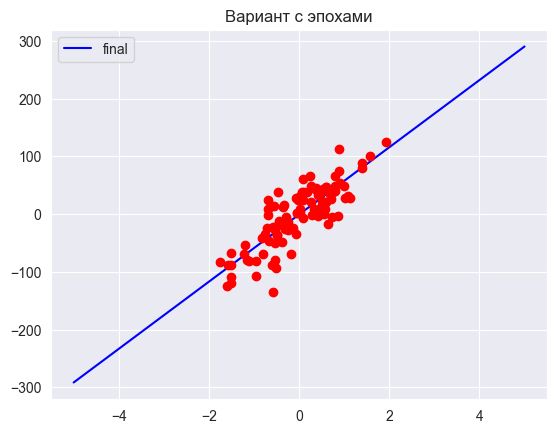

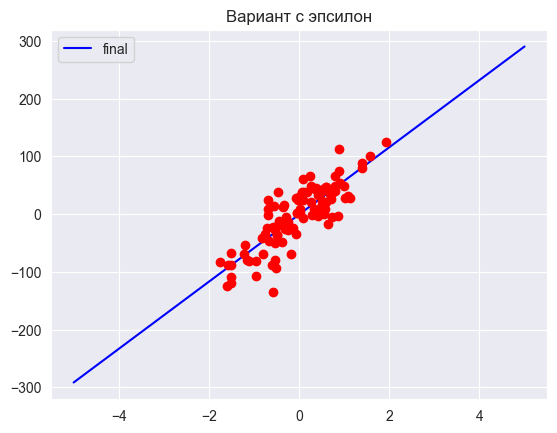

In [2]:
X, Y = make_regression(n_samples=100, n_features=1, noise=30)
X = X[:, 0]

n = float(len(X))  # Число элементов в выборке


def epochs_type(k=0, b=0, alpha=0.01, epochs=1000):
    # alpha - Скорость спуска по градиенту
    # epochs - Количество итераций прохождения по всем данным
    error = 0  # значение MSE

    # F = (y_pred - y)^2 / N, где y_pred = k * x + b
    # То есть F = (k * x + b - y)^2 / N

    # Выполняем шаги градиентного спуска
    for i in range(epochs):
        # if i % 300 == 0:
        #     plt.plot(np.linspace(-5, 5, 100), k * np.linspace(-10, 10, 100) + b, label=i)

        Y_pred = k * X + b  # Текущее предсказание вектора Y
        D_k = (2 / n) * sum(X * (Y_pred - Y))  # Производная функции потерь по k
        D_b = (2 / n) * sum(Y_pred - Y)  # Производная функции потерь по b
        k = k - alpha * D_k  # Обновляем w1 по направлению минус градиента
        b = b - alpha * D_b  # Обновляем w0 по направлению минус градиента
        error = sum((Y_pred - Y) ** 2) / n

    print(f'epochs - k = {k}, b = {b}, error = {error}')
    return k, b


def epsilon_type(k=0, b=0, alpha=0.01, epsilon=0.001):
    D_k = float('inf')  # Значение производной функции потерь в точке по k
    D_b = float('inf')  # Значение производной функции потерь в точке по b
    error = 0  # Значение MSE

    # F = (y_pred - y)^2 / N, где y_pred = k * x + b
    # То есть F = (k * x + b - y)^2 / N

    cnt = 0
    # Выполняем шаги градиентного спуска
    while (D_b ** 2 + D_k ** 2) ** 0.5 >= epsilon:
        # if cnt % 300 == 0:
        #     plt.plot(np.linspace(-5, 5, 100), k * np.linspace(-10, 10, 100) + b, label=cnt)

        Y_pred = k * X + b  # Текущее предсказание вектора Y
        D_k = (2 / n) * sum(X * (Y_pred - Y))  # Производная функции потерь по k
        D_b = (2 / n) * sum(Y_pred - Y)  # Производная функции потерь по b
        k = k - alpha * D_k  # Обновляем w1 по направлению минус градиента
        b = b - alpha * D_b  # Обновляем w0 по направлению минус градиента
        error = sum((Y_pred - Y) ** 2) / n

        cnt += 1
    print(f'epsilon - k = {k}, b = {b}, error = {error}')
    return k, b


x = np.linspace(-5, 5, 100)

k1, b1 = epochs_type()
plt.plot(x, k1 * x + b1, color="blue", label='final')
plt.plot(X, Y, 'or')
plt.title('Вариант с эпохами')
plt.legend()

plt.figure()

k2, b2 = epsilon_type()
plt.plot(x, k2 * x + b2, color="blue", label='final')
plt.plot(X, Y, 'or')
plt.title('Вариант с эпсилон')
plt.legend()
plt.show()

### Реализация линейной регрессии, используя матричный дифференциал

k=64.86217744742505, b=1.175906831142301, error=38.84045025972516


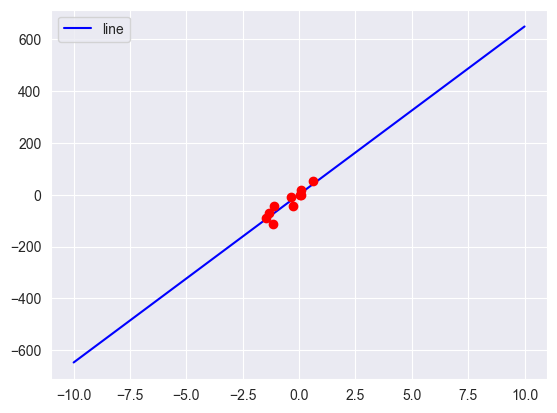

In [3]:
X, Y = make_regression(n_samples=10, n_features=1, noise=30)
X = X[:, 0]


def LinearRegressionByMatrix(X: np.array, Y: np.array, fit_intercept: bool = True):
    """
    :param X: матрица объектов
    :param Y: вектор (матрица с 1 столбцом) ответов
    :param fit_intercept: добавить ли константную переменную в данные?
    
    :return: одномерный numpy-array с полученными коэффициентами beta
    """

    if fit_intercept:
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)

    xxt = np.dot(X.T, X)
    xxt_inv = np.linalg.inv(xxt)
    xxt_inv_xxt = np.dot(xxt_inv, X.T)
    final_betas = np.dot(xxt_inv_xxt, Y)

    return final_betas


betas = LinearRegressionByMatrix(X.reshape(-1, 1), Y.reshape(-1, 1))
k, b = betas[0], betas[1]
error = sum((k * X + b - Y) ** 2) / n

print(f'k={k[0]}, b={b[0]}, error={error}')

x = np.linspace(-10, 10, 100)
plt.plot(x, k * x + b, color="blue", label='line')
plt.plot(X, Y, 'or')
plt.legend()
plt.show()

### Сравнение алгоритмов линейной регрессии

LR - coefficients = [[ 1.09222984 -0.08978126]], intercept = [3.82908913]
LS - coefficients = [ 0.80449321 -0.04961097], intercept = [3.25718146]
RD - coefficients = [[ 1.03906767 -0.08254781]], intercept = [3.72745536]
EN - coefficients = [ 0.84082308 -0.05507057], intercept = [3.33768711]

LogR - coefficients = [-0.04365088 -0.34436674],
intercept = [ 2.12017487 -2.24848725 -0.33251123  0.46082361]


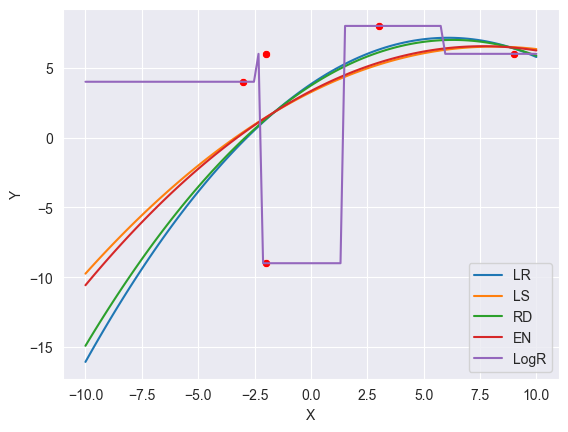

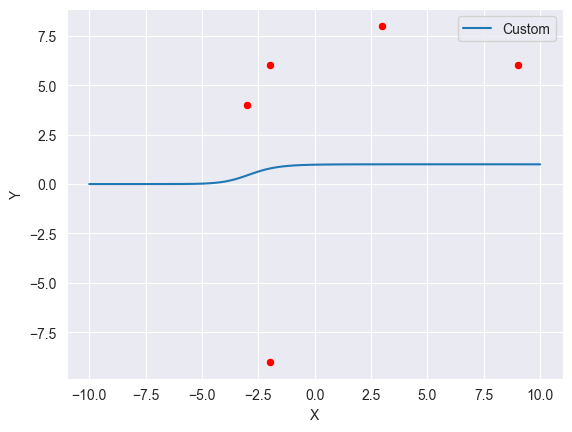

In [4]:
import pandas as pd

a = pd.DataFrame({'X': np.random.randint(-10, 10, 5), 'Y': np.random.randint(-10, 10, 5)})
X = a['X'].to_frame()
y = a['Y'].to_frame()
sns.scatterplot(x='X', y='Y', data=a, color='red', marker='o')
X_dots = np.linspace(-10, 10, 100).reshape(-1, 1)

# X = np.random.uniform(-10, 10, 100).reshape(-1, 1)  # Random X values in range [-10, 10]
# y = X ** 2 + np.random.normal(0, 5, X.shape)  # y = x^2 + some noise
# sns.scatterplot(x=X[:, 0], y=y[:, 0], color='red', marker='o')
# X_dots = X

PF = PolynomialFeatures(degree=2, include_bias=False)
PF.fit(X)

LR = LinearRegression(fit_intercept=True)  #fit_intercept - свободный коэффициент
LR.fit(X=PF.transform(X), y=y)
y_dots_lr = LR.predict(PF.transform(X_dots))[:, 0]
sns.lineplot(x=X_dots[:, 0], y=y_dots_lr, label='LR')
print(f'LR - coefficients = {LR.coef_}, intercept = {LR.intercept_}')

# Lasso = LR + L1 regularization
LS = Lasso()
LS.fit(X=PF.transform(X), y=y)
y_dots_ls = LS.predict(PF.transform(X_dots))
sns.lineplot(x=X_dots[:, 0], y=y_dots_ls, label='LS')
print(f'LS - coefficients = {LS.coef_}, intercept = {LS.intercept_}')

# Ridge = LR + L2 regularization
RD = Ridge()
RD.fit(X=PF.transform(X), y=y)
y_dots_rd = RD.predict(PF.transform(X_dots))[:, 0]
sns.lineplot(x=X_dots[:, 0], y=y_dots_rd, label='RD')
print(f'RD - coefficients = {RD.coef_}, intercept = {RD.intercept_}')

# ElasticNet = LR + L1 regularization + L2 regularization
EN = ElasticNet()
EN.fit(X=PF.transform(X), y=y)
y_dots_en = EN.predict(PF.transform(X_dots))
sns.lineplot(x=X_dots[:, 0], y=y_dots_en, label='EN')
print(f'EN - coefficients = {EN.coef_}, intercept = {EN.intercept_}')

# LogisticRegression = LR + log-loss + sigmoid (в данном случае не имеет смысла, тк у нас регрессия)
LogR = LogisticRegression()
LogR.fit(X=PF.transform(X), y=y)
y_dots_logr = LogR.predict(PF.transform(X_dots))
sns.lineplot(x=X_dots[:, 0], y=y_dots_logr, label='LogR')
print(f'\nLogR - coefficients = {LogR.coef_[0]},\nintercept = {LogR.intercept_}')

plt.figure()


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Реализация LogisticRegression через LinearRegression (неправильно) 
# В реальности это модель с функцией ошибок log-loss и sigmoid на predicted y
y_sigmoid = sigmoid(y_dots_lr)
sns.scatterplot(x='X', y='Y', data=a, color='red', marker='o')
sns.lineplot(x=X_dots[:, 0], y=y_sigmoid, label='Custom')
plt.show()